### iNeuron Internship
    1. Project Domain : Sales & Marketing
    2. Project Name   : Stores Sales Prediction
### Dataset Source 
    1. Link : https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data
### Feartues
    1. Item_Identifier       : Unique product ID 
    2. Item_Weight           : Weight of product 
    3. Item_Fat_Content      : Whether the product is low fat or not 
    4. Item_Visibility       : The % of total display area of all products in a store allocated to the particular product 
    5. Item_Type             : The category to which the product belongs 
    6. Item_MRP              : Maximum Retail Price (list price) of the product 
    7. Outlet_Identifier     : Unique store ID 
    8. Outlet_Establishment_Year : The year in which store was established 
    9. Outlet_Size           : The size of the store in terms of ground area covered 
    10. Outlet_Location_Type : The type of city in which the store is located 
    11. Outlet_Type          : Whether the outlet is just a grocery store or some sort of supermarket 
    12. Item_Outlet_Sales    : Sales of the product in the particular store. Is is the outcome variable to be predicted.
### General Information
    1. Our problem comes under Supervised Learning Technique. Because we are going to predict sales of a store. Here the output type is continuous value, so we need to apply Regression algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

From the above output cell,
### Information 1
Two of the featues out of twelve features contains NULL values.

    1. Item_Weight - 1462 (Numerical)
    2. Outlet size - 2410 (Categorical)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Categorical Variable Analysis

In [7]:
feature = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 
                   'Outlet_Location_Type', 'Outlet_Type']

uniqueValue = lambda i: df[i].unique()
uniqueValuesCount = lambda i: len(df[i].value_counts())

uniqueValueCounts = [uniqueValuesCount(i) for i in feature]
uniqueValues = [str(uniqueValue(i).tolist()) for i in feature]

uniqueValues[0] = str(['...']) #Item identifier contains too many unique values. view it seperately
data = {'Unique_Value_Counts': uniqueValueCounts, 'Unique_Values': uniqueValues}

pd.DataFrame(data=data, index=feature)

,Unique_Value_Counts,Unique_Values
Item_Identifier,1559,['...']
Item_Fat_Content,5,"['Low Fat', 'Regular', 'low fat', 'LF', 'reg']"
Item_Type,16,"['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']"
Outlet_Identifier,10,"['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019']"
Outlet_Size,3,"['Medium', nan, 'High', 'Small']"
Outlet_Location_Type,3,"['Tier 1', 'Tier 3', 'Tier 2']"
Outlet_Type,4,"['Supermarket Type1', 'Supermarket Type2', 'Grocery Store', 'Supermarket Type3']"


From the above output cell,
### Information 2
We can know about different unique values and its count for categorical features. There are seven categorical features in the given dataset.

## 1. Outlet_Size

In [8]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

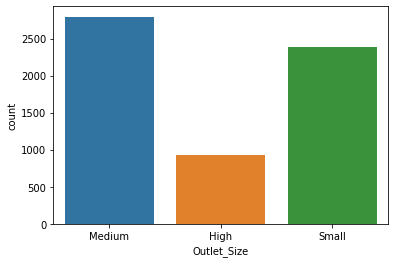

In [9]:
sns.countplot(x="Outlet_Size", data=df)

<Figure size 1440x1080 with 0 Axes>

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

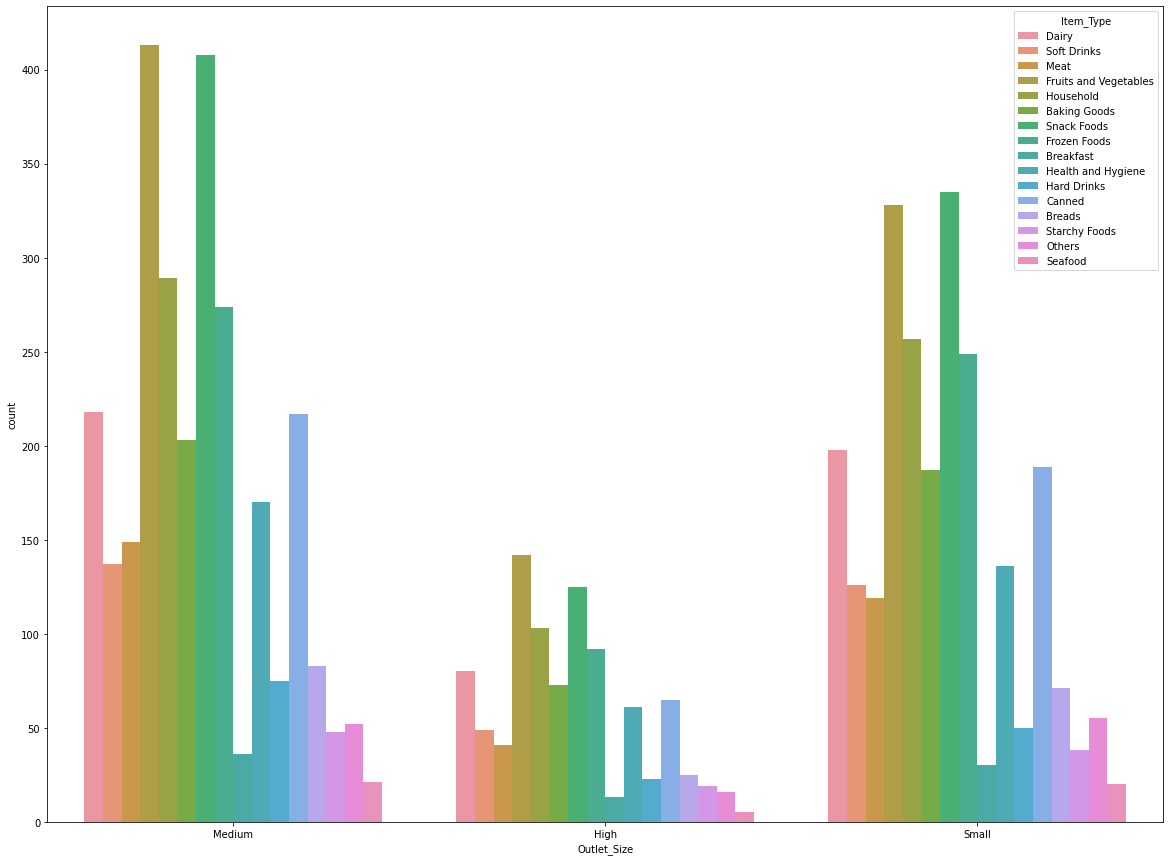

In [10]:
plt.figure(figsize=(20, 15))
sns.countplot(x="Outlet_Size", hue="Item_Type", data=df)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

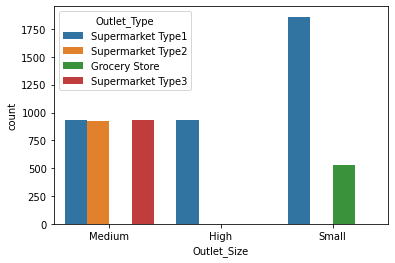

In [11]:
sns.countplot(x="Outlet_Size", hue="Outlet_Type", data=df)

From the above output cell, 
### Assumption
    1. Products with 'Small' size is only distributed to 'Grocery Stores'.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

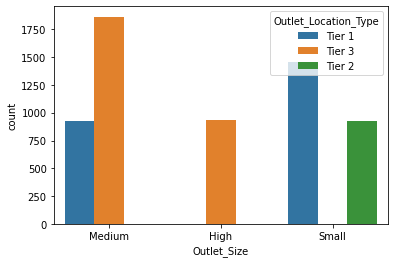

In [12]:
sns.countplot(x="Outlet_Size", hue="Outlet_Location_Type", data=df)

From the above output cell, 
### Assumption
    1. Products with 'Small' size is only distributed to 'Tier 2' locations.
    2. Mostly 'Medium' sized products are distributed to 'Tier 3' locations and 'Small' sized products are distributed to 'Tier 1' locations

# Numerical Variable Analysis